# Transactions

In [1]:
# Importing Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets import the necessary file and view 
dataset = pd.read_excel(r"C:\Users\*****\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx",header=None, sheet_name='Transactions')
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Note: The data and information in this documen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
3,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
4,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361


In [3]:
# Due to improper header will drop the header
dataset=dataset.drop(0)
# Make the zero row as a header
header_row = 0
dataset.columns = dataset.iloc[header_row]
# Lets drop the zero row
dataset = dataset.drop(dataset.index[0])
# Lets reset the index
dataset = dataset.reset_index(drop=True)
# View the data looks fine
dataset.head(5)

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [4]:
# Lets check the table 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null object
product_id                 20000 non-null object
customer_id                20000 non-null object
transaction_date           20000 non-null object
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null object
standard_cost              19803 non-null object
product_first_sold_date    19803 non-null object
dtypes: object(13)
memory usage: 2.0+ MB


In [5]:
# Checking the number of unique, count and frequency
dataset.describe()

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,20000,0,2476,2017-08-18 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [6]:
# Lets check for null values in each column
dataset.isnull().sum()

1
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [2]:
# The above shows the Completeness issue with the respective columns:
# 1. online_order
# 2. brand
# 3. standard_cost

In [7]:
# Remove all null valued row with respect to 'brand' column
dataset = dataset[dataset['brand'].notna()]

In [8]:
# After removing the null valus the dataset has zero null values in most of the columns 
dataset.isnull().sum()

1
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [9]:
# The Validity issue found in the 'standard_cost' and 'product_first_sold_date' due to no proper format
# In this 'order_status' column has the Relevncy issue due to the cancelled data
dataset['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [12]:
# Resolving the Relevncy issue by removing the cancelled data and keeping only the Approver data
# lets remove the cancelled data from the dataset
dataset = dataset[dataset['order_status'] != 'Cancelled']
dataset['order_status'].value_counts()

Approved    19625
Name: order_status, dtype: int64

In [13]:
# The column 'brand' looks fine
dataset['brand'].value_counts()

Solex             4211
Giant Bicycles    3283
WeareA2B          3265
OHM Cycles        3016
Trek Bicycles     2965
Norco Bicycles    2885
Name: brand, dtype: int64

In [14]:
#Lets check with the column 'product_line'
dataset['product_line'].value_counts()

Standard    14048
Road         3932
Touring      1225
Mountain      420
Name: product_line, dtype: int64

In [15]:
#Lets check with the column 'product_class'
dataset['product_class'].value_counts()

medium    13701
high       2978
low        2946
Name: product_class, dtype: int64

In [16]:
#Lets check with the column 'product_size'
dataset['product_size'].value_counts()

medium    12876
large      3938
small      2811
Name: product_size, dtype: int64

In [18]:
# Create a missing column 'Profit'
dataset['Profit'] = dataset['list_price'] - dataset['standard_cost']
dataset['Profit'].head(5)

0      17.87
1    1702.55
2    1544.61
3     817.36
4    1055.82
Name: Profit, dtype: object

In [20]:
#Lets Visualize the Transactions with respect to months and weekdays
#Now convert the column'transaction_date' to pandas datetime
dataset['transaction_date']=dataset['transaction_date'].map(pd.to_datetime)

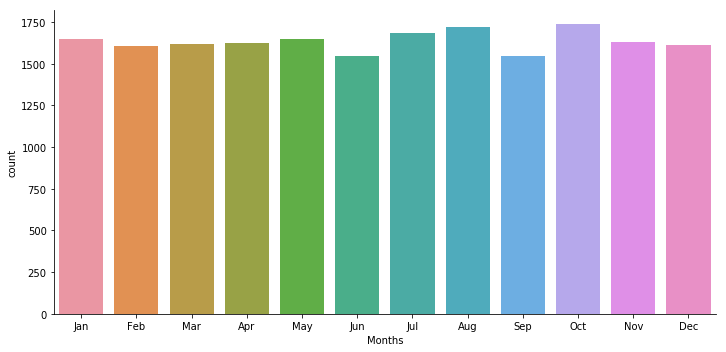

In [21]:
# Visualizing the Transaction on each months
def months(dataset):
    return dataset.month
dataset['Months']=dataset['transaction_date'].map(months)
dataset['Months'] = dataset['Months'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
sns.catplot('Months',kind='count', data=dataset, aspect = 2, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

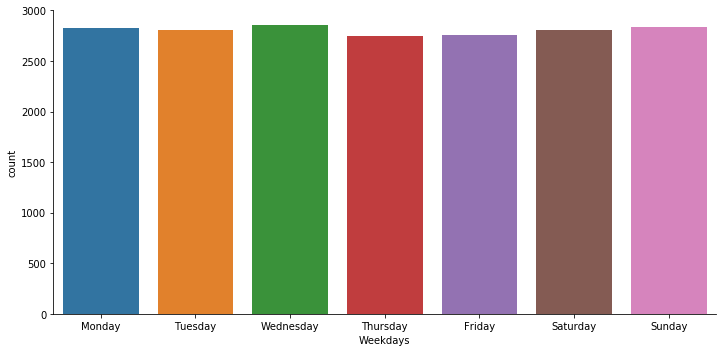

In [22]:
# Visualizing the Transaction on weekdays
def days_of_week(dataset):
    return dataset.weekday()
dataset['Weekdays']=dataset['transaction_date'].map(days_of_week)
dataset['Weekdays'] = dataset['Weekdays'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.catplot('Weekdays',kind='count', data=dataset, aspect = 2, order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

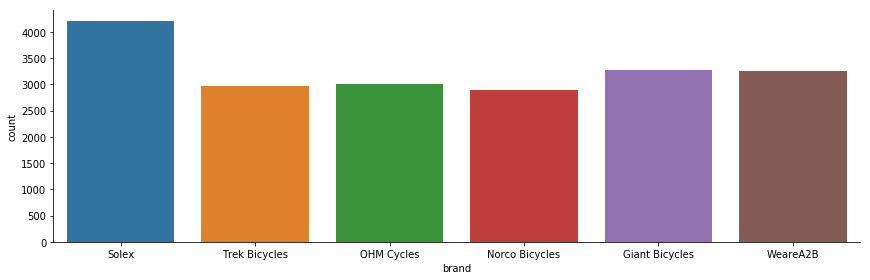

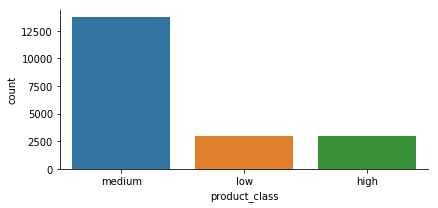

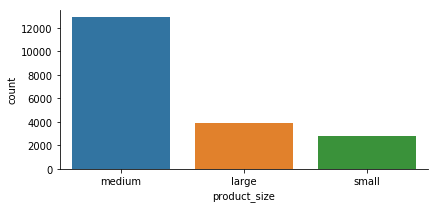

In [23]:
#Visualizing the brand, product class and size has sold most
sns.catplot('brand',kind='count', data=dataset, aspect = 3, height = 4)
sns.catplot('product_class',kind='count', data=dataset, height = 3, aspect = 2)
sns.catplot('product_size',kind='count', data=dataset,height= 3, aspect = 2)

In [24]:
# Lets extract the Cleaned Data for further analysis
dataset.to_csv(r'C:\Users\*****\Desktop\KPMG\Cleaned_Transactions.csv', index = False)